In [2]:
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [63]:
len(X_test)

10000

In [64]:
X_train[0].shape

(28, 28)

In [65]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

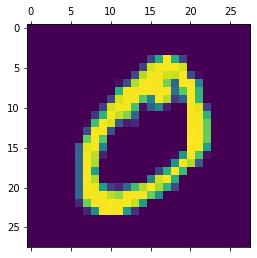

In [66]:
plt.matshow(X_train[1])

In [67]:
y_train[1]

0

One of the reasons why accuracy comes low in deep learning is because of normalization. Often data needs to be normalized meaning between 0 and 1.
Here the input value is between 0 and 255. So, I converted it between 0 and 1.

In [68]:
X_train = X_train / 255
X_test = X_test / 255

In [92]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10,activation='sigmoid')
])

In [111]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [ ]:
X_train_flattened[0]

In [112]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3429 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0395 - accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0303 - accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0263 - accuracy: 0.9925


In [97]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9770


[0.07473836839199066, 0.9769999980926514]

In [99]:
y_predicted = model.predict(X_test)

In [100]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [102]:
y_predicted[0]

array([1.8291324e-02, 6.6769123e-04, 1.5948689e-01, 9.2545193e-01,
       9.3516443e-05, 1.9708008e-02, 7.0624520e-07, 9.9974549e-01,
       1.9064912e-01, 2.3747355e-01], dtype=float32)